# RBF Neural Network

### Importing the required Libraries

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
from sklearn.cluster import KMeans
np.random.seed(228)

## Generating Data

In [2]:
points = list()
#generating random data points according to the given specifications -2 < x1 < 2 and -2 < x2 < 2 (total 441)
for x in range(0, 21):
    for y in range(0, 21):
        points.append([-2.0+(x * 0.2) , -2.0+(y * 0.2) ])
np.random.shuffle(points)
# labeling the data as +1 or -1 based on the mapping function
labeled_data = list()
for data in points:
    func = (data[0] * data[0]) + (data[1] * data[1])
    if func <= 1:
        labeled_data.append([data[0], data[1], 1])
    else:
        labeled_data.append([data[0], data[1], -1])
labeled_data = np.array(labeled_data)


- <font size="3"> Assigning labels to the randomly generated dataset based on the mapping function condition, generates a pattern in the form of circle with radius 1 where the data points inside the circle have positive unit value whereas outside points have negative unit value.</font>



## Dividing the data into train and test sets

In [3]:
#80-20 split is performed as per the question specifications
pct = 0.20
data_len = len(labeled_data)
train,test = labeled_data[int(data_len*pct):],labeled_data[:int(data_len*pct)]


In [4]:
X_train = train[:,:-1] #training data
y_train = train[:, -1:] #training labels
X_test = test[:, :-1] #testing data
y_test = test[:, -1:] #testing labels

As per the the question requirements Gaussian kernal function is used.
 The basic idea behind using this function is to make the higher dimensional feature space seem almost linearly seprable.


In [5]:

# defining rbf function with gaussian kernal
def rbf(distance, sigma):
    return math.exp((-1) * (distance) / ((2) * (sigma ** 2)))

# Generating interpolation matrix for gaussian kernal function
def calculate_interpolation_Matrix(data, centers, sigma):
    result = np.zeros((len(data), len(centers)))
    for i in range(len(data)):
        for j in range(len(centers)):
            dist = float(((data[i][0] - centers[j][0]) ** 2) + ((data[i][1] - centers[j][1]) ** 2))
            result[i][j] = rbf(dist, sigma)
    return result





As per the the question requirements MSE is used to compare the performance results.
The MSE helps us to understand how close a fitted line is to the datapoints. 
It takes the average of the square of the differences of predicted and actual value
We use MSE is to determine the closeness of predicted values to the actual ones.
This implies that the lower values are better since they indicate the predicted values are close to the actual values


In [6]:
# defining mean square error function
def error(test_output,target_output):
    return np.square(np.sum(target_output - test_output, axis=1)).mean(axis=0)

# defining function to calculate accuracy
def calculate_acc(true_value, predicted_value):
    c = 0
    n = len(true_value)
    if n == 0:
        return 0
    for i in range(n):
        if (true_value[i] == 1 and predicted_value[i] >= 0) or (true_value[i] == -1 and predicted_value[i] < 0):
            c = c + 1
    return (c / n)


## Training neural network

Here we define our neural network which is used to transform all data points to Radial basis function using gaussian kernel followed by application of linear transformation to the same data in order to obtain the output
The RBF function helps us to increase the dimensionality making the data separation of non-linearly separable data 
simpler. The weights are then calculated by utilizing the kernel function. Finally,the predictions are obtained by the dot product of wights and output of radial function.


In [7]:
# defining the Neural network
def NN(centers, sigma_list): 
    # creating lists to store the values calculated above
    training_error_l = list()
    testing_error_l = list()
    training_accuracy_l = list()
    testing_accuracy_l = list()
    
    for spread in sigma_list:
        
        # calculating dot product of weights and predicting on training set
        G = calculate_interpolation_Matrix(X_train, centers, spread)
        G_inverse = np.linalg.pinv(G)
        Weight = G_inverse.dot(y_train)
        ytrain_predict = G.dot(Weight) 
        
        # Predicting on the test data.
        r = calculate_interpolation_Matrix(X_test, centers, spread)
        ytest_predict = r.dot(Weight)
        
       # storing the values to lists
        training_error_l.append(error(y_train, ytrain_predict))
        testing_error_l.append(error(y_test,ytest_predict))
        training_accuracy_l.append(calculate_acc(y_train, ytrain_predict))
        testing_accuracy_l.append(calculate_acc(y_test,ytest_predict))
        
    return np.array(training_error_l), np.array(testing_error_l), np.array(training_accuracy_l), np.array(testing_accuracy_l)

In [8]:
# defining a range of spread parameters
sigma_val = [0.01, 0.05, 0.1, 0.2,1.5, 2, 3, 4, 5, 8, 10, 12, 15, 20]

## Using all the points in the Training Set as Centers

In [9]:
# Passing all training data as centers to the Neural network created 
trainingerrorA, testingerrorA, trainingAccuracyA, testingAccuracyA = NN(X_train, sigma_val)

In [10]:
# printing the performance results 
print('{:<10s}{:<20s}{:<20s}{:<20s}{:<20s}'.format('Sigma','Train Accuracy','Test Accuracy', 'Training Error','Test Error'))
        
for i in range(len(trainingerrorA)):
    print('{:<10.2f}{:<20.5f}{:<20.5f}{:<20.5f}{:<20.5f}'.format(sigma_val[i], trainingAccuracyA[i], testingAccuracyA[i], trainingerrorA[i], testingerrorA[i]))

Sigma     Train Accuracy      Test Accuracy       Training Error      Test Error          
0.01      1.00000             0.97727             0.00000             1.00000             
0.05      1.00000             0.95455             0.00000             0.99827             
0.10      1.00000             0.95455             0.00000             0.50814             
0.20      1.00000             0.94318             0.00000             0.25924             
1.50      0.98867             0.97727             0.06132             0.34855             
2.00      0.98584             0.98864             0.07248             0.39627             
3.00      0.98584             0.97727             0.09735             0.17361             
4.00      0.98300             0.98864             0.10273             0.14032             
5.00      0.98017             0.98864             0.10460             0.13985             
8.00      0.98017             0.98864             0.11575             0.16456             

In [11]:
# Plotting the performance result (MSE) vs different spread parameter values

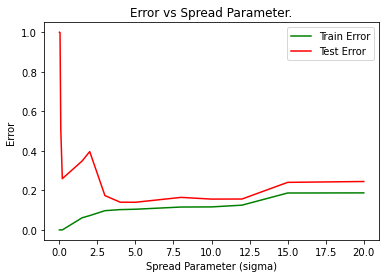

In [12]:
plt.plot(sigma_val, trainingerrorA, 'g', label = "Train Error")
plt.plot(sigma_val, testingerrorA, 'r', label = "Test Error")
plt.title("Error vs Spread Parameter.")
plt.xlabel("Spread Parameter (sigma)")
plt.ylabel("Error ")
plt.legend()
plt.show()


In [13]:
# Plotting the performance result (Accuracy) vs different spread parameter values

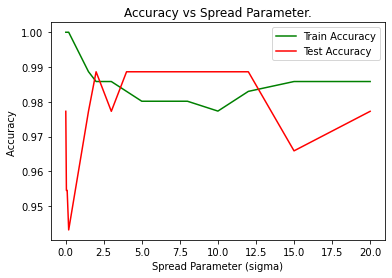

In [14]:
plt.plot(sigma_val, trainingAccuracyA, 'g', label = "Train Accuracy")
plt.plot(sigma_val, testingAccuracyA, 'r', label = "Test Accuracy")
plt.title("Accuracy vs Spread Parameter.")
plt.xlabel("Spread Parameter (sigma)")
plt.ylabel("Accuracy ")
plt.legend()
plt.show()


## Observations

We observed that the best spread parameter value came out to be at value 5. The general trend helps us to understand that if the sigma value is very small, the accuracy is high for training set . This can be explaied as when the sigma value is less, the gaussian function is also small leading to avoidance of overlapping of different centers
On the other hand, when the sigma value is large the accuracy decreases, eventually becoming constant. This can be explained as with the increase in sigma value, the Gaussian function increases which leads to overlapping of center functions which too eventually stop updating.
A drawback of using training data as centers is that it will eventually overfit leading to loss of generality

## Using randomly 150 points from the dataset as centers

In [15]:
#selecting 150 random centers from shuffled data using approach 1 
centers = np.copy(train)
np.random.shuffle(centers)
shuffled_cent = centers[:150]
random_centers = shuffled_cent[:, :2]


In [16]:
# Passing 150 randomly selected centers to the Neural network created 

In [17]:
trainingerrorB, testingerrorB, trainingAccuracyB, testingAccuracyB = NN(random_centers, sigma_val)

In [18]:
# printing the performance results 

print('{:<10s}{:<20s}{:<20s}{:<20s}{:<20s}'.format('Sigma','Train Accuracy','Test Accuracy', 'Training Error','Test Error'))

        
for i in range(len(trainingerrorB)):
    print('{:<10.2f}{:<20.5f}{:<20.5f}{:<20.5f}{:<20.5f}'.format(sigma_val[i], trainingAccuracyB[i], testingAccuracyB[i], trainingerrorB[i], testingerrorB[i]))

Sigma     Train Accuracy      Test Accuracy       Training Error      Test Error          
0.01      0.93484             0.94318             0.57507             1.00000             
0.05      0.97450             0.96591             0.57464             0.99920             
0.10      0.97450             0.96591             0.40739             0.69071             
0.20      0.98867             0.95455             0.08833             0.18351             
1.50      0.99150             0.97727             0.06137             0.35992             
2.00      0.98584             0.97727             0.07265             0.37408             
3.00      0.98584             0.97727             0.09740             0.18854             
4.00      0.98300             0.98864             0.10273             0.14062             
5.00      0.98017             0.98864             0.10461             0.13975             
8.00      0.98300             0.98864             0.11574             0.16597             

In [19]:
# Plotting the performance result (MSE) vs different spread parameter values

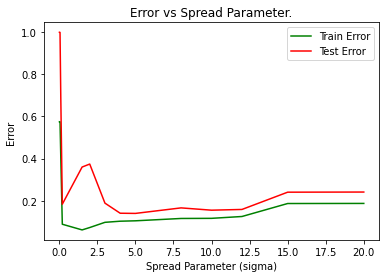

In [20]:
plt.plot(sigma_val, trainingerrorB, 'g', label = "Train Error")
plt.plot(sigma_val, testingerrorB, 'r', label = "Test Error")
plt.title("Error vs Spread Parameter.")
plt.xlabel("Spread Parameter (sigma)")
plt.ylabel("Error ")
plt.legend()
plt.show()


In [21]:
# Plotting the performance result (Accuracy) vs different spread parameter values

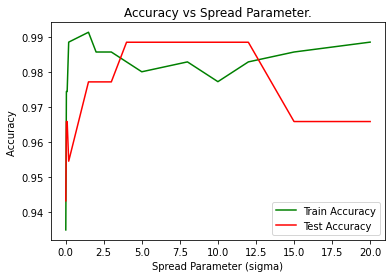

In [22]:
plt.plot(sigma_val, trainingAccuracyB, 'g', label = "Train Accuracy")
plt.plot(sigma_val, testingAccuracyB, 'r', label = "Test Accuracy")
plt.title("Accuracy vs Spread Parameter.")
plt.xlabel("Spread Parameter (sigma)")
plt.ylabel("Accuracy ")
plt.legend()
plt.show()


## Observations

The best spread parameter as observed from the results is 5.
A large variation is observed in the case of random selection of centers of gaussian functions from training data.
This may lead to model converging to local optima instead of global optimum.

## Using KMeans clustering to get 150 centroids

In [23]:
#applying kmeans model and getting the centroids of 150 clusters
Kmeans_model = KMeans(n_clusters = 150, random_state = 42).fit(X_train)
selected_centers = Kmeans_model.cluster_centers_

In [24]:
# Passing 150 centeroids obtained through kmeans as centers to the Neural network created 
trainingerrorC, testingerrorC, trainingAccuracyC, testingAccuracyC = NN( selected_centers, sigma_val)

In [25]:
# printing the performance results 

print('{:<10s}{:<20s}{:<20s}{:<20s}{:<20s}'.format('Sigma','Train Accuracy','Test Accuracy', 'Training Error','Test Error'))
        
for i in range(len(trainingerrorC)):
    print('{:<10.2f}{:<20.5f}{:<20.5f}{:<20.5f}{:<20.5f}'.format(sigma_val[i], trainingAccuracyC[i], testingAccuracyC[i], trainingerrorC[i], testingerrorC[i]))

Sigma     Train Accuracy      Test Accuracy       Training Error      Test Error          
0.01      0.70255             0.78409             0.89235             1.00000             
0.05      0.98300             0.96591             0.27874             0.99809             
0.10      0.98584             0.96591             0.12540             0.68464             
0.20      0.99717             0.97727             0.04565             0.12715             
1.50      0.98867             0.97727             0.06135             0.19632             
2.00      0.98584             0.97727             0.07262             0.37693             
3.00      0.98584             0.97727             0.09743             0.17692             
4.00      0.98300             0.98864             0.10273             0.14070             
5.00      0.98017             0.98864             0.10461             0.13986             
8.00      0.98300             0.98864             0.11573             0.16650             

In [26]:
# Plotting the performance result (MSE) vs different spread parameter values

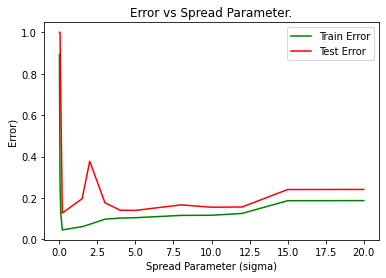

In [27]:
plt.plot(sigma_val, trainingerrorC, 'g', label = "Train Error")
plt.plot(sigma_val, testingerrorC, 'r', label = "Test Error")
plt.title("Error vs Spread Parameter.")
plt.xlabel("Spread Parameter (sigma)")
plt.ylabel("Error)")
plt.legend()
plt.show()


In [28]:
# Plotting the performance result (Accuracy) vs different spread parameter values

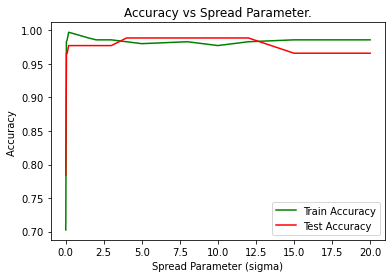

In [29]:
plt.plot(sigma_val, trainingAccuracyC, 'g', label = "Train Accuracy")
plt.plot(sigma_val, testingAccuracyC, 'r', label = "Test Accuracy")
plt.title("Accuracy vs Spread Parameter.")
plt.xlabel("Spread Parameter (sigma)")
plt.ylabel("Accuracy ")
plt.legend()
plt.show()


## Observations

The best spread parameter as observed from the results in this case too is 5
In this case K-Means was used to select center of gaussian functions. K-Means helps choose centers which donot overlap leading to lesser variation

## Plotting comparisons of all three models

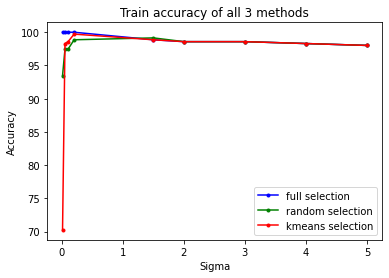

In [30]:
# Training Accuracy Plot
plt.plot(sigma_val[:9], trainingAccuracyA[:9]*100, marker='.',color="blue", label="full selection")
plt.plot(sigma_val[:9], trainingAccuracyB[:9]*100, marker='.',color="green", label="random selection")
plt.plot(sigma_val[:9], trainingAccuracyC[:9]*100, marker='.',color="red", label="kmeans selection")

plt.xlabel('Sigma')
plt.ylabel('Accuracy')
plt.title('Train accuracy of all 3 methods')
plt.legend()
plt.show()

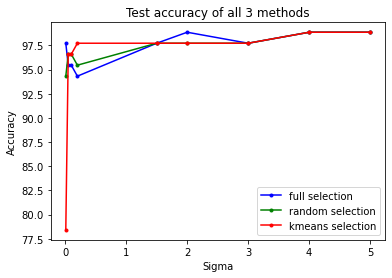

In [31]:
# Test Accuracy Plot
plt.plot(sigma_val[:9], testingAccuracyA[:9]*100, marker='.',color="blue", label="full selection")
plt.plot(sigma_val[:9], testingAccuracyB[:9]*100, marker='.',color="green", label="random selection")
plt.plot(sigma_val[:9], testingAccuracyC[:9]*100, marker='.',color="red", label="kmeans selection")

plt.xlabel('Sigma')
plt.ylabel('Accuracy')
plt.title('Test accuracy of all 3 methods')
plt.legend()
plt.show()

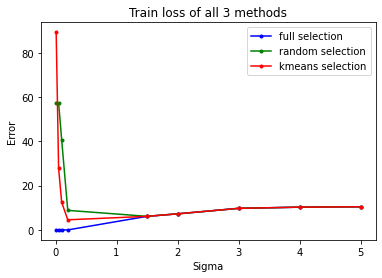

In [32]:
# Training Error Plot
plt.plot(sigma_val[:9], trainingerrorA[:9]*100, marker='.',color="blue", label="full selection")
plt.plot(sigma_val[:9], trainingerrorB[:9]*100, marker='.',color="green", label="random selection")
plt.plot(sigma_val[:9], trainingerrorC[:9]*100, marker='.',color="red", label="kmeans selection")

plt.xlabel('Sigma')
plt.ylabel('Error')
plt.title('Train loss of all 3 methods')
plt.legend()
plt.show()

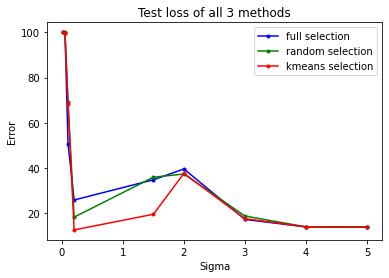

In [33]:
# Test Error Plot
plt.plot(sigma_val[:9], testingerrorA[:9]*100, marker='.',color="blue", label="full selection")
plt.plot(sigma_val[:9], testingerrorB[:9]*100, marker='.',color="green", label="random selection")
plt.plot(sigma_val[:9], testingerrorC[:9]*100, marker='.',color="red", label="kmeans selection")

plt.xlabel('Sigma')
plt.ylabel('Error')
plt.title('Test loss of all 3 methods')
plt.legend()
plt.show()

## Comparison -

- It can be seen that in the case of full selection of centers, abrupt changes in loss and accuracy can be observed with the change in spread parameter sigma but after the sigma value becomes greater than 2, the trajectory stabilizes . Intially the test accuracy of full selection is better than the other two, but it can because of higher dimensionality and small gaussian function.
- In case of random initialization and k- means center assignment, the loss and accuract are much more stable as compared to full selection 
- Upon executing this code a number of times without a fixed seed value, it is observed that the performance results of random initialization and k-means are similar with little differencs, with either of them outperforming the other in different executions.
- The test accuracy is almost the same for spread parameter value 5 which is the best performing for all three models. The value of sigma being 5 as the best performing spread parameter for all three models can be attributed to the fact that the decision boundary is smooth for this value, due to almost all datapoints being considered. Whereas for sigma=0.5 the decision boundary is very confined.
- Test error is lower for k-means as compared to other two for lower sigma values.